PLANT DISEASE DETECTION SYSTEM - MILESTONE 1
[INFO] Loading dataset from: c:\Users\indik\twilio-power-dialer\Machine-Learning-project\PlantVillage
[INFO] Dataset directory verified.
[INFO] Successfully identified 15 unique plant classes.
------------------------------------------------------------


C:\Users\indik\AppData\Local\Temp\ipykernel_24152\3078002901.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys())[:5], y=list(class_counts.values())[:5], palette='viridis')


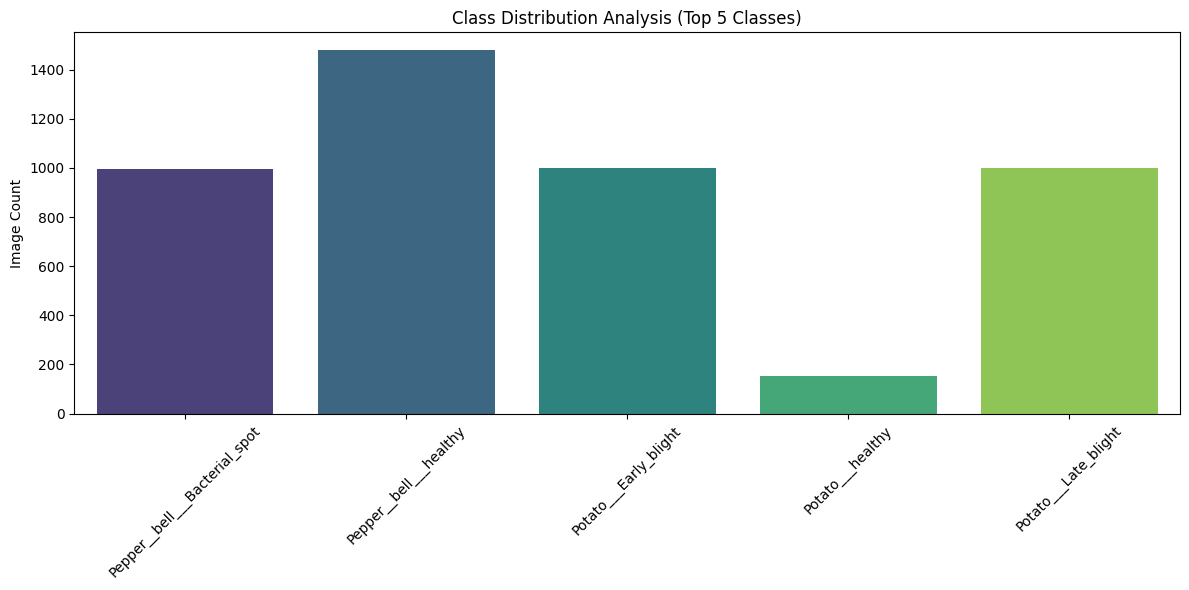

[STATUS] Starting Preprocessing Pipeline...
[INFO] Data loaded. Feature Matrix: (300, 12288), Target Vector: (300,)
[INFO] Training Set: 240 samples | Test Set: 60 samples
------------------------------------------------------------
[STATUS] Training Baseline Model (Random Forest, n=10)...
[RESULT] Baseline Accuracy: 23.33%
[STATUS] Training Enhanced Model (Random Forest, n=100)...
[RESULT] Enhanced Model Accuracy: 45.00%

CLASSIFICATION REPORT:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.60      0.75      0.67         4
                     Pepper__bell___healthy       0.50      0.33      0.40         3
                      Potato___Early_blight       0.57      1.00      0.73         4
                       Potato___Late_blight       0.40      0.50      0.44         4
                           Potato___healthy       1.00      0.29      0.44         7
                      Tomato_Bacterial_

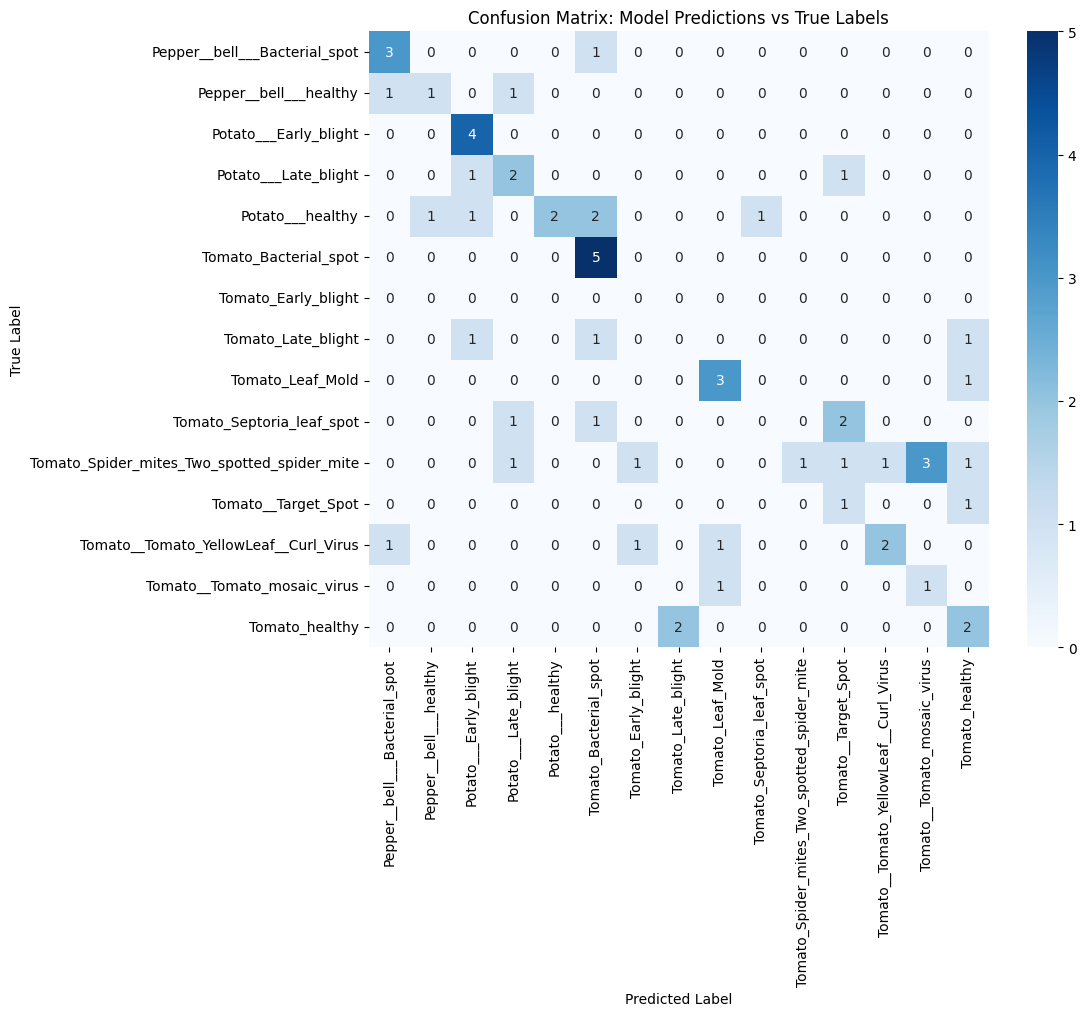

[INFO] Generating sample grid visualization...


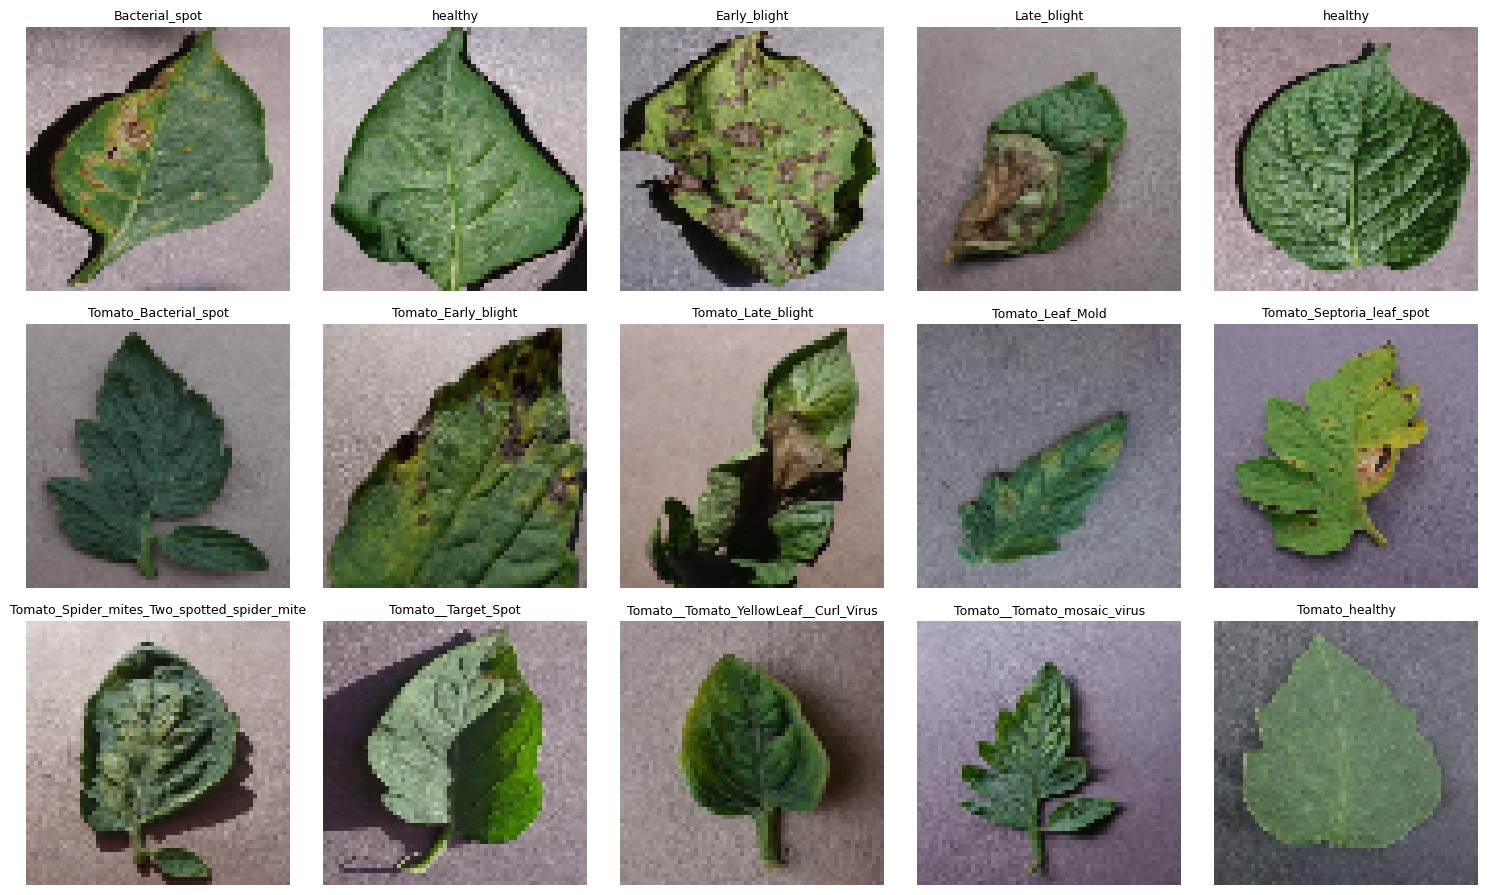


[DONE] Milestone 1 Execution Complete.


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration
dataset_path = 'PlantVillage' 
img_size = 64

print("="*60)
print("PLANT DISEASE DETECTION SYSTEM - MILESTONE 1")
print("="*60)

# --- 1. Data Acquisition & Validation ---
print(f"[INFO] Loading dataset from: {os.path.abspath(dataset_path)}")

if not os.path.exists(dataset_path):
    print("[ERROR] Dataset folder not found. Please check path.")
else:
    print("[INFO] Dataset directory verified.")

class_counts = {}
images_path = []
labels = []

# Traverse dataset directories
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.JPG'))]
        if files:
            class_counts[folder] = len(files)
            # Load a subset (20 images/class) for rapid prototyping/milestone demo
            for file in files[:20]: 
                images_path.append(os.path.join(folder_path, file))
                labels.append(folder)

print(f"[INFO] Successfully identified {len(class_counts)} unique plant classes.")
print("-" * 60)

# --- 2. Exploratory Data Analysis (EDA) ---
# Visualization 1: Class Distribution
if class_counts:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys())[:5], y=list(class_counts.values())[:5], palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Class Distribution Analysis (Top 5 Classes)")
    plt.ylabel("Image Count")
    plt.tight_layout()
    plt.show()

# --- 3. Data Preprocessing Pipeline ---
print("[STATUS] Starting Preprocessing Pipeline...")
data = []

for img_path in images_path:
    try:
        img = cv2.imread(img_path)
        if img is not None:
            # Resize for uniformity and flatten for Random Forest input
            img = cv2.resize(img, (img_size, img_size))
            data.append(img.flatten())
    except Exception as e:
        print(f"[WARN] Failed to process image: {img_path}")

# Normalize pixel values to range [0, 1]
X = np.array(data) / 255.0
y = np.array(labels)

print(f"[INFO] Data loaded. Feature Matrix: {X.shape}, Target Vector: {y.shape}")

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"[INFO] Training Set: {X_train.shape[0]} samples | Test Set: {X_test.shape[0]} samples")
print("-" * 60)

# --- 4. Model Training & Comparison ---
print("[STATUS] Training Baseline Model (Random Forest, n=10)...")
rf_baseline = RandomForestClassifier(n_estimators=10, random_state=42)
rf_baseline.fit(X_train, y_train)
base_acc = accuracy_score(y_test, rf_baseline.predict(X_test))

print(f"[RESULT] Baseline Accuracy: {base_acc:.2%}")

print("[STATUS] Training Enhanced Model (Random Forest, n=100)...")
rf_enhanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_enhanced.fit(X_train, y_train)
preds = rf_enhanced.predict(X_test)
enhanced_acc = accuracy_score(y_test, preds)

print(f"[RESULT] Enhanced Model Accuracy: {enhanced_acc:.2%}")
print("="*60)

# --- 5. Evaluation Metrics & Interpretability ---
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, preds, zero_division=0))

# Visualization 2: Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix: Model Predictions vs True Labels")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.show()

# Visualization 3: Sample Grid
print("[INFO] Generating sample grid visualization...")
unique_labels = np.unique(labels)
plt.figure(figsize=(15, 15))
for i, label in enumerate(unique_labels[:25]): # Limit to 25 for grid
    idx = np.where(y == label)[0][0]
    img_reshaped = X[idx].reshape(img_size, img_size, 3)
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.cvtColor(img_reshaped.astype('float32'), cv2.COLOR_BGR2RGB))
    plt.title(label.split("___")[-1], fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n[DONE] Milestone 1 Execution Complete.")